<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice_II/blob/main/11_PCA_analiza_g%C5%82%C3%B3wnych_sk%C5%82adowych_rekonstrukcja_obrazu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from keras.datasets import mnist

Generowanie dancyh

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


ograniczenie ilości danych

In [3]:
X_train = X_train[:5000]
y_train = y_train[:5000]

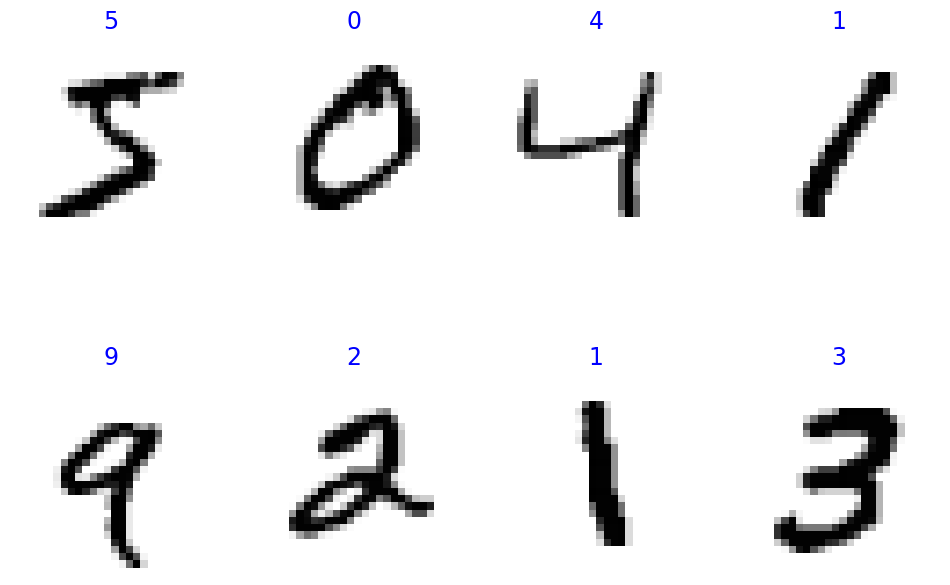

In [4]:
plt.figure(figsize=(12, 8))
for i in range(8):
  plt.subplot(240 + i + 1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(y_train[i], color='blue', fontsize=17)
  plt.axis('off')
plt.show()

Wypłaszczanie obrazów

In [5]:
X_train.shape

(5000, 28, 28)

In [6]:
X_train = X_train.reshape(-1, 28 * 28)

In [7]:
X_train.shape

(5000, 784)

In [8]:
X_train = X_train / 255.

PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(5000, 148)

In [10]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5
...,...,...,...
143,0.000497,0.948219,144
144,0.000491,0.948711,145
145,0.000482,0.949193,146
146,0.000473,0.949665,147


In [11]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained variance ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative explained variance')],
                layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=950, template='plotly_dark'))
fig.show()

In [12]:
X_train_pca[0].shape

(148,)

In [13]:
approx = pca.inverse_transform(X_train_pca)
approx[0].shape

(784,)

Porównanie obrazu oryginalnego i po redukcji wymiarowosci

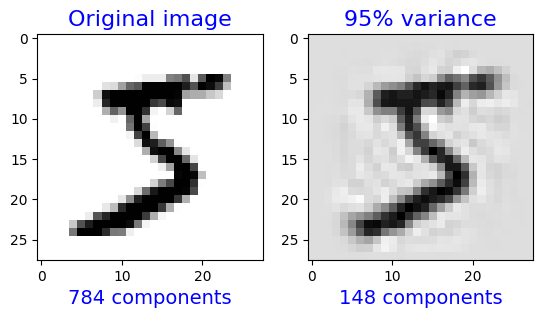

In [14]:
plt.subplot(121)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray_r', interpolation='nearest')
plt.xlabel('784 components', color='blue', fontsize=14)
plt.title('Original image', color='blue', fontsize=16)

plt.subplot(122)
plt.imshow(approx[0].reshape(28, 28), cmap='gray_r', interpolation='nearest')
plt.xlabel(f'{pca.n_components_} components', color='blue', fontsize=14)
plt.title('95% variance', color='blue', fontsize=16)
plt.show()

Porównanie procentu wyjaśnionej wariancji

In [15]:
def make_pca(n_components, data, idx=0):  # all in one function 👈

    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)

    approx = pca.inverse_transform(data_pca)

    plt.imshow(approx[idx].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    plt.xlabel(f'{pca.n_components_} components', color='blue', fontsize=12)
    plt.title(f'{str(n_components)}% var', color='blue', fontsize=15)

Pętla po funkcji make_pca

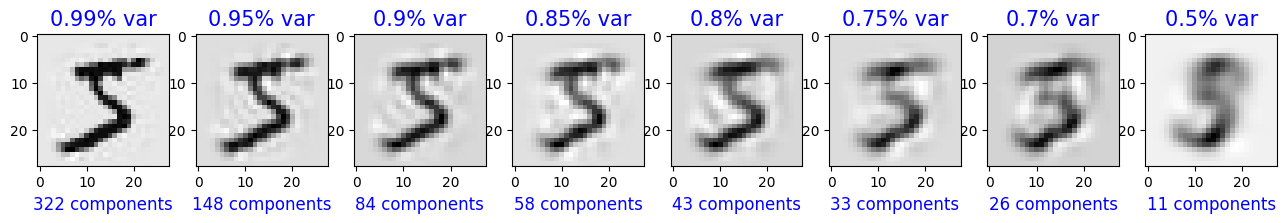

In [16]:
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train)
plt.show()

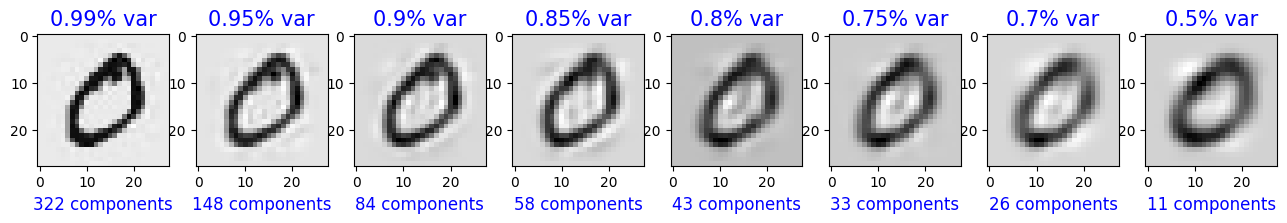

In [17]:
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train, idx=1)
plt.show()

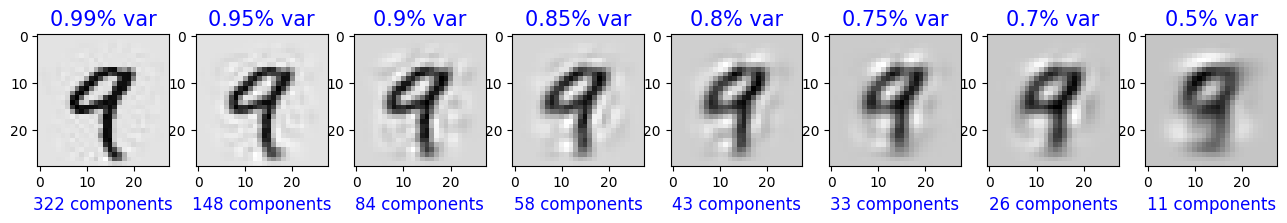

In [18]:
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train, idx=4)
plt.show()